# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk

In [2]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
countries = pd.read_csv("countries.csv")

In [4]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           227 non-null    object 
 1   Region            227 non-null    object 
 2   Population        227 non-null    int64  
 3   Area              227 non-null    int64  
 4   Pop_density       227 non-null    object 
 5   Coastline_ratio   227 non-null    object 
 6   Net_migration     224 non-null    object 
 7   Infant_mortality  224 non-null    object 
 8   GDP               226 non-null    float64
 9   Literacy          209 non-null    object 
 10  Phones_per_1000   223 non-null    object 
 11  Arable            225 non-null    object 
 12  Crops             225 non-null    object 
 13  Other             225 non-null    object 
 14  Climate           205 non-null    object 
 15  Birthrate         224 non-null    object 
 16  Deathrate         223 non-null    object 
 1

In [6]:
cat_features_ = countries[countries.dtypes[countries.dtypes == 'object'].index].copy()
num_features_ = countries[countries.dtypes[countries.dtypes != 'object'].index].copy()

In [7]:
cat_features_selected = cat_features_.iloc[:, 2:].astype('str')
num_features_selected = cat_features_selected.applymap(lambda x: x.replace(',', '.')).astype(np.float)

In [8]:
cat_features = cat_features_.iloc[:, :2].applymap(lambda x: x.strip())
num_features = pd.concat([num_features_, num_features_selected], axis=1)

In [9]:
cat_features.isna().sum()

Country    0
Region     0
dtype: int64

In [10]:
num_features.isna().sum()

Population           0
Area                 0
GDP                  1
Pop_density          0
Coastline_ratio      0
Net_migration        3
Infant_mortality     3
Literacy            18
Phones_per_1000      4
Arable               2
Crops                2
Other                2
Climate             22
Birthrate            3
Deathrate            4
Agriculture         15
Industry            16
Service             15
dtype: int64

In [11]:
num_features.fillna(num_features.median(), axis=0, inplace=True)

In [12]:
num_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.0000,4786994.000,1.749777e+07,1.313974e+09
Area,227.0,5.982270e+05,1.790282e+06,2.000,4647.5000,86600.000,4.418110e+05,1.707520e+07
GDP,227.0,9.671586e+03,1.003065e+04,500.000,1900.0000,5550.000,1.570000e+04,5.510000e+04
Pop_density,227.0,3.790471e+02,1.660186e+03,0.000,29.1500,78.800,1.901500e+02,1.627150e+04
Coastline_ratio,227.0,2.116533e+01,7.228686e+01,0.000,0.1000,0.730,1.034500e+01,8.706600e+02
Net_migration,227.0,3.762115e-02,4.856712e+00,-20.990,-0.9050,0.000,9.800000e-01,2.306000e+01
Infant_mortality,227.0,3.531524e+01,3.519341e+01,2.290,8.2150,21.000,5.533500e+01,1.911900e+02
Literacy,227.0,8.360441e+01,1.910052e+01,17.600,76.4000,92.500,9.780000e+01,1.000000e+02
Phones_per_1000,227.0,2.350066e+02,2.261030e+02,0.200,38.5000,176.200,3.829000e+02,1.035600e+03
Arable,227.0,1.376736e+01,1.298643e+01,0.000,3.3800,10.420,2.000000e+01,6.211000e+01


## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [13]:
def q1():
    return list(cat_features['Region'].sort_values().unique())
q1()

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [14]:
from sklearn.preprocessing import KBinsDiscretizer

X = num_features['Pop_density'].values.reshape(-1, 1)
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile').fit(X)
transform = est.transform(X)

In [15]:
percetile_gt90 = []
for t in list(transform.reshape(1, -1)[0]):
    if t >= 9:
        percetile_gt90.append(t)

In [16]:
def q2():
    return len(percetile_gt90)
q2()

23

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [17]:
X_onehot = countries[['Region', 'Climate']].fillna('Unknown')

onehot = sk.preprocessing.OneHotEncoder(sparse=False, handle_unknown='ignore').fit(X_onehot)
oh_transform = onehot.transform(X_onehot)

In [18]:
def q3():
    return int(oh_transform.shape[1])
q3()

18

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [19]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [20]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
    ('scaler', sk.preprocessing.StandardScaler())
]).fit(num_features)

df_test = pd.DataFrame([test_country[2:]], columns=num_features.columns)
p_transform = pipeline.transform(df_test)

df_result = pd.DataFrame(p_transform, columns=num_features.columns)

In [21]:
def q4():
    return float(np.round(df_result['Arable'], 3))
q4()

-1.047

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

In [22]:
num_features['Net_migration'].describe()

count    227.000000
mean       0.037621
std        4.856712
min      -20.990000
25%       -0.905000
50%        0.000000
75%        0.980000
max       23.060000
Name: Net_migration, dtype: float64

**Como podemos ver, os valores do primeio, segundo e terceiro quartil e a média estão bem distantes dos valores de mínimo e máximo**

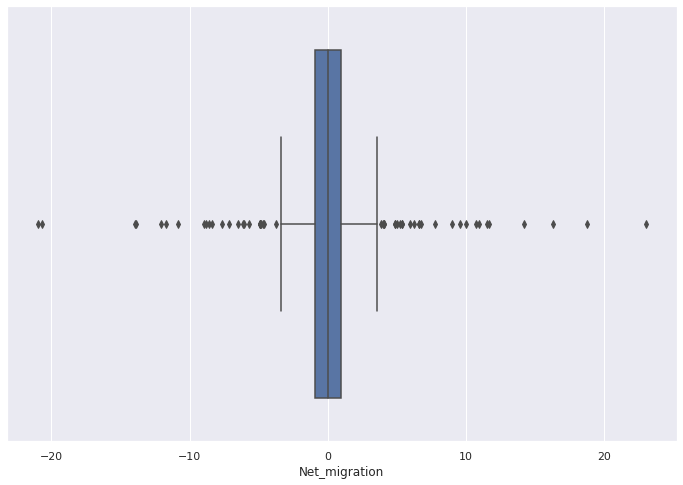

In [23]:
sns.boxplot(num_features['Net_migration'])

**E analisando o gráfico podemos observar que a dispersão dos dados é bem pequena, e existe evidências de valores discrepantes**

In [24]:
# X E (Q1 - 1.5 x IQR, Q3 + 1.5 x IQR) => x é outlier

feature = countries['Net_migration'].str.replace(',', '.').astype(np.float)
q1_ = feature.quantile(q=.25)
q3_ = feature.quantile(q=.75)

iqr = q3_ - q1_

high_out = q3_ + 1.5 * iqr
low_out = q1_ - 1.5 * iqr

In [25]:
interval_high_out = sum(feature > high_out)
interval_low_out = sum(feature < low_out)

In [26]:
def q5():
    threshold = .7
    is_remove_outiliers = bool(interval_low_out + interval_high_out/len(feature) < threshold)
    return interval_low_out, interval_high_out, is_remove_outiliers
q5()

(24, 26, False)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [72]:
from sklearn.datasets import fetch_20newsgroups

In [29]:
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newgroups = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [51]:
bow = sk.feature_extraction.text.CountVectorizer().fit(newgroups.data)
bow_transform = bow.transform(newgroups.data)

In [55]:
df_bow = pd.DataFrame(bow_transform.toarray(), columns=bow.get_feature_names())

In [62]:
def q6():
    return int(df_bow['phone'].sum())
q6()

213

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [64]:
tfidf = sk.feature_extraction.text.TfidfVectorizer().fit(newgroups.data)
tfidf_transform = tfidf.transform(newgroups.data)

In [65]:
df_tfidf = pd.DataFrame(tfidf_transform.toarray(), columns=tfidf.get_feature_names())

In [70]:
def q7():
    return float(np.round(df_tfidf['phone'].sum(), 3))
q7()

8.888